<a href="https://colab.research.google.com/github/schauppi/Udemy_Tensorflow/blob/schauppi/Recurrent_Neural_Networks_Time_Series_and_Sequence_Data/Autoregressive_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

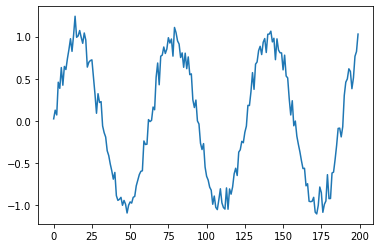

In [38]:
#create synthetic dataset
#series = np.sin(0.1*np.arange(200))
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
plt.plot(series)
plt.show()

In [39]:
#build the dataset 
#T = 10 - use 10 previous timesteps to predict
T = 10
X = []
Y = []
for t in range(len(series)- T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("NxT", X.shape)
print("N", Y.shape)

NxT (190, 10)
N (190,)


In [40]:
print(X[0])
print(Y[0])

[0.0259961  0.12835998 0.07195333 0.4594123  0.38685364 0.63276171
 0.42385944 0.64623189 0.60985174 0.73996998]
0.8486084733217406


In [41]:
print(X[1])
print(Y[1])

[0.12835998 0.07195333 0.4594123  0.38685364 0.63276171 0.42385944
 0.64623189 0.60985174 0.73996998 0.84860847]
0.9742841896023838


In [42]:
print(X[2])
print(Y[2])

[0.07195333 0.4594123  0.38685364 0.63276171 0.42385944 0.64623189
 0.60985174 0.73996998 0.84860847 0.97428419]
0.824693599343465


In [43]:
#autoregressive linear model
i = keras.layers.Input(shape=(T,))
x = keras.layers.Dense(1)(i)
model = keras.models.Model(i, x)

In [44]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [45]:
optimizer = keras.optimizers.Adam(lr=0.1)
model.compile(loss="mse", optimizer=optimizer)

In [46]:
history = model.fit(X[:-N//2], Y[:-N//2], 
                    epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 0s 72ms/step - loss: 0.2400 - val_loss: 0.0851
Epoch 2/80
3/3 [==============================] - 0s 21ms/step - loss: 0.0984 - val_loss: 0.0972
Epoch 3/80
3/3 [==============================] - 0s 28ms/step - loss: 0.0604 - val_loss: 0.0787
Epoch 4/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0748 - val_loss: 0.0503
Epoch 5/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0519 - val_loss: 0.0700
Epoch 6/80
3/3 [==============================] - 0s 21ms/step - loss: 0.0576 - val_loss: 0.0504
Epoch 7/80
3/3 [==============================] - 0s 22ms/step - loss: 0.0491 - val_loss: 0.0462
Epoch 8/80
3/3 [==============================] - 0s 29ms/step - loss: 0.0337 - val_loss: 0.0481
Epoch 9/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0385 - val_loss: 0.0369
Epoch 10/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0315 - val_loss: 0.0359
Epoch 11/80
3/3 [============

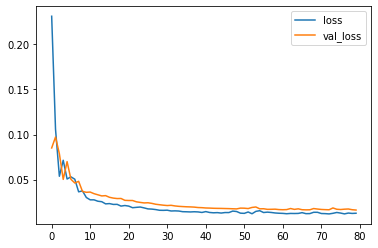

In [47]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

In [48]:
#forecasting values
validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N//2] #1-D array of length T
while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] #1x1 array

  validation_predictions.append(p)

  #new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

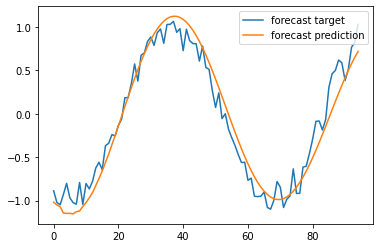

In [49]:
plt.plot(validation_target, label="forecast target")
plt.plot(validation_predictions, label="forecast prediction")
plt.legend()